## EDA & Marketing Analysis

Dataset. Sales Supermarket

Objective. find insights that can be used to inform and optimize marketing decisions.

The analysis is split up into 4 major parts: Customer Demographics, Product Performance, Sales Channel Performance, and Correlations

### Data Preparation

In [1]:
# loading packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# importing data set

data=pd.read_csv("marketing_data.csv", sep=',')

# view dataset in table format

data.head(n=50)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,...,2,7,1,0,0,0,0,1,0,SP
5,7348,1958,PhD,Single,"$71,691.00",0,0,3/17/14,0,336,...,5,2,0,0,0,0,0,1,0,SP
6,4073,1954,2n Cycle,Married,"$63,564.00",0,0,1/29/14,0,769,...,7,6,1,0,0,0,0,1,0,GER
7,1991,1967,Graduation,Together,"$44,931.00",0,1,1/18/14,0,78,...,3,5,0,0,0,0,0,0,0,SP
8,4047,1954,PhD,Married,"$65,324.00",0,1,1/11/14,0,384,...,9,4,0,0,0,0,0,0,0,US
9,9477,1954,PhD,Married,"$65,324.00",0,1,1/11/14,0,384,...,9,4,0,0,0,0,0,0,0,IND


In [3]:
# general information about the dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4    Income              2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

- 2,240 records with 28 columns.
- Column title for Income has atypo with an extra space in " Income"
- The "Income" needs its datatype changed to float
- The variable "Dt_customer" needs its datatype changed to datetime

### Data Cleanning

#### Titles and Format

In [4]:
# isolate the column titles into a list

column_titles = []
for i in data.columns:
    column_titles.append(i)

In [5]:
# rename the 'Income' title

data = data.rename(columns={column_titles[4]:'Income'})

In [6]:
# change the Dt_Customer field data type to datetime

data["Dt_Customer"] = pd.to_datetime(data["Dt_Customer"], format='%m/%d/%y')

# change the Income field data type to Float

data["Income"] = data["Income"].str.replace("$","").str.replace(",","")
data["Income"] = data["Income"].astype(float)

#### Duplicate Entries

In [7]:
# isolate the duplicate entries

duplicates = data.duplicated()

# count the number of duplicate entries

duplicate_records = []

for i in duplicates:
    if i == True:
        duplicate_data.append(i)

# print the number of duplicates
print(len(duplicate_records))

0


Observations. No duplicate entries

#### Null Values

In [8]:
data.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Response                0
Complain                0
Country                 0
dtype: int64

Observations. 24 entries with missing "Income" value

#### Categorical Fields

In [9]:
# make a list of categorical variables

cat_var = ["Education", "Marital_Status", "Country"]

# checking all unique values for each cat variable

for i in cat_var:
    print(f"{i} Unique Values : {data[i].unique()}")


Education Unique Values : ['Graduation' 'PhD' '2n Cycle' 'Master' 'Basic']
Marital_Status Unique Values : ['Divorced' 'Single' 'Married' 'Together' 'Widow' 'YOLO' 'Alone' 'Absurd']
Country Unique Values : ['SP' 'CA' 'US' 'AUS' 'GER' 'IND' 'SA' 'ME']


Observations.
- '2n cycle' = 'Master'
- 'Yolo', 'Alone', 'Absurd' = 'Single'


In [10]:
# convert '2n Cycle' to 'Master'

data['Education'] = data['Education'].replace(['2n Cycle'], value='Master')

# Convert 'YOLO', 'Alone', and 'Absurd' values to 'Single'

data["Marital_Status"] = data["Marital_Status"].replace(["YOLO", "Alone", "Absurd"], value="Single")


In [11]:
data.head(n=60)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,32474.0,1,1,2014-05-11,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,21474.0,1,0,2014-04-08,0,6,...,2,7,1,0,0,0,0,1,0,SP
5,7348,1958,PhD,Single,71691.0,0,0,2014-03-17,0,336,...,5,2,0,0,0,0,0,1,0,SP
6,4073,1954,Master,Married,63564.0,0,0,2014-01-29,0,769,...,7,6,1,0,0,0,0,1,0,GER
7,1991,1967,Graduation,Together,44931.0,0,1,2014-01-18,0,78,...,3,5,0,0,0,0,0,0,0,SP
8,4047,1954,PhD,Married,65324.0,0,1,2014-01-11,0,384,...,9,4,0,0,0,0,0,0,0,US
9,9477,1954,PhD,Married,65324.0,0,1,2014-01-11,0,384,...,9,4,0,0,0,0,0,0,0,IND


#### Numerical Fields

In [12]:
# Group numerical variables into a new dataframe
num = ['Year_Birth','Income', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']
data_num = data[num]

In [13]:
data.head(n=10)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,32474.0,1,1,2014-05-11,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,21474.0,1,0,2014-04-08,0,6,...,2,7,1,0,0,0,0,1,0,SP
5,7348,1958,PhD,Single,71691.0,0,0,2014-03-17,0,336,...,5,2,0,0,0,0,0,1,0,SP
6,4073,1954,Master,Married,63564.0,0,0,2014-01-29,0,769,...,7,6,1,0,0,0,0,1,0,GER
7,1991,1967,Graduation,Together,44931.0,0,1,2014-01-18,0,78,...,3,5,0,0,0,0,0,0,0,SP
8,4047,1954,PhD,Married,65324.0,0,1,2014-01-11,0,384,...,9,4,0,0,0,0,0,0,0,US
9,9477,1954,PhD,Married,65324.0,0,1,2014-01-11,0,384,...,9,4,0,0,0,0,0,0,0,IND


In [14]:
# checking basic info from numerical variables

data.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.149107,0.009375
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.356274,0.096391
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


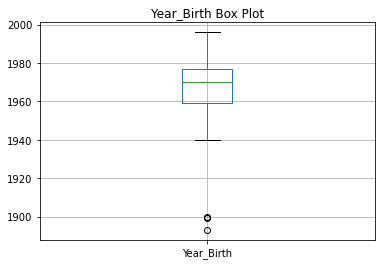

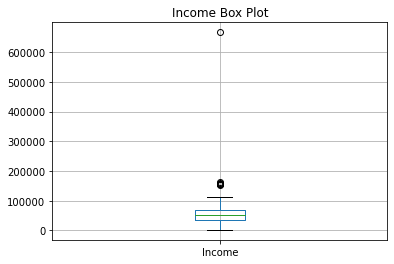

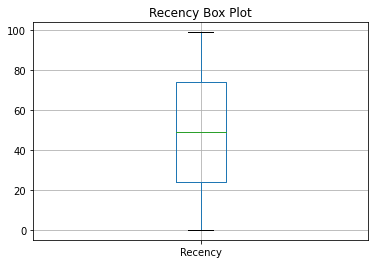

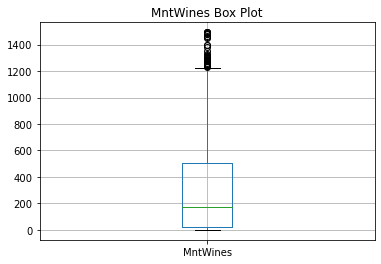

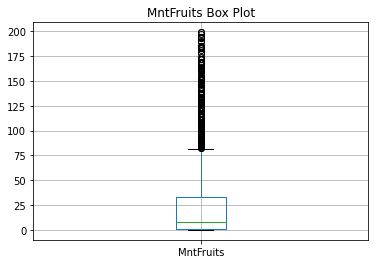

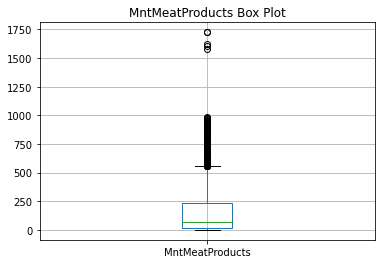

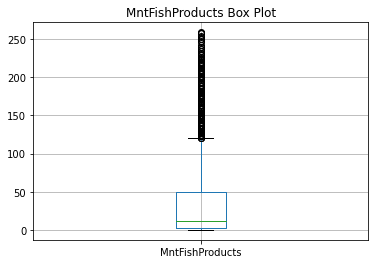

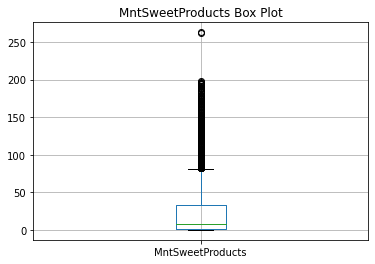

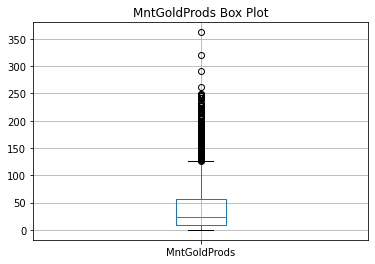

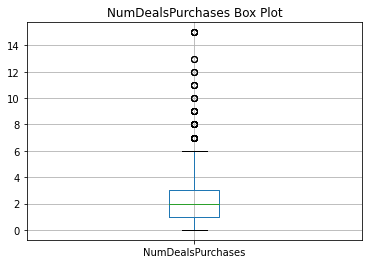

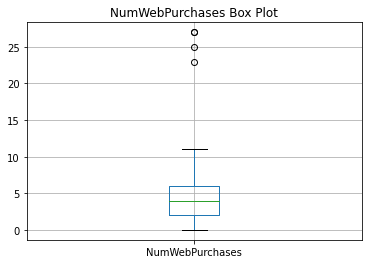

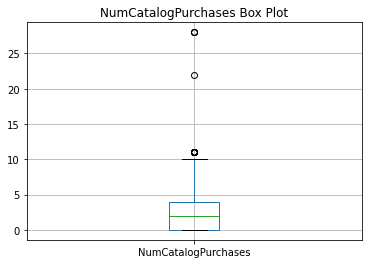

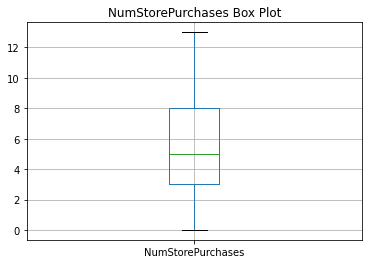

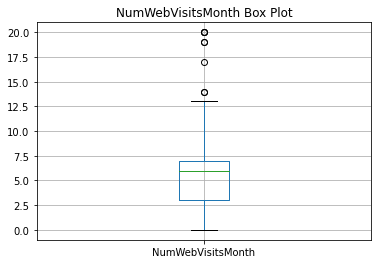

In [15]:
# displaying boxplots for each numerical field to identify outliers

for col in data_num.columns:
    plt.figure()
    data_num.boxplot([col])
    plt.title(f'{col} Box Plot')

Observations.
- Outliers for birth year, might be typos.
- Income variable needs to be corrected

it is important to take note and be careful when eliminating entries

In [16]:
# keeping birth years over 1900

data = data[data["Year_Birth"]>1900]

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Income Distribution')

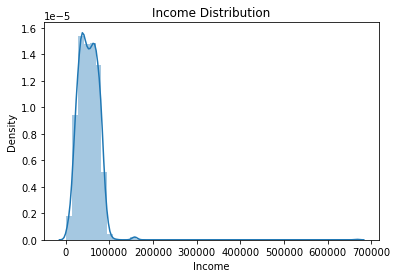

In [17]:
# plotting the income distribution

sns.distplot(data["Income"])
plt.title("Income Distribution")

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Log Income Distribution')

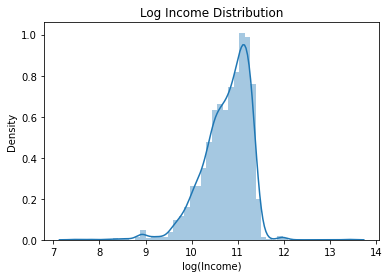

In [18]:
# add a field for log(income)

data["log(Income)"] = np.log(data["Income"])

# plotting the income distribution

sns.distplot(data["log(Income)"])
plt.title("Log Income Distribution")

We use the log of Income to normalize the variable. We are removing the skewness of curve to make our analysis more interpretable.

### Feature Engineering

#### Amount Spent

In [19]:
# creating amount spent field
data["Amount_Spent"] = data["MntWines"] + data["MntFruits"] + data["MntMeatProducts"] + data["MntFishProducts"] + data["MntSweetProducts"] + data["MntGoldProds"]

#### Products Purchased

In [20]:
# creating products purchased field

data["Products_Purchased"] = data["NumWebPurchases"]+data["NumCatalogPurchases"]+data["NumStorePurchases"]

#### Total Children

In [21]:
# creating total children field

data["Total_Children"] = data["Kidhome"] + data ["Teenhome"]

#### Age Demographic



In [22]:
# creating age demographic field

data["Age_Demographic"] = pd.cut(data["Year_Birth"], bins=[1900,1945,1964,1980,1996,2012], labels=["Silent Gen", "Baby Boomer", "Gen X","Millennial", "Gen Z"])

### Customer Demographics



#### Number of Customers by Demographics



In [23]:
# renaming columns to get cleaner graph labels

data = data.rename(columns={"Amount_Spent":"Amount Spent", "Marital_Status":"Marital Status", "Products_Purchased":"Products Purchased", "Total_Children": "Total Children", "Age_Demographic": "Age Demographic"})

In [24]:
# making a list of customer demographic variables

dem_variables = ["Country", "Marital Status","Age Demographic", "Total Children", "Education"]

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.8/si

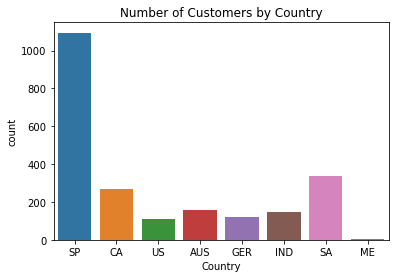

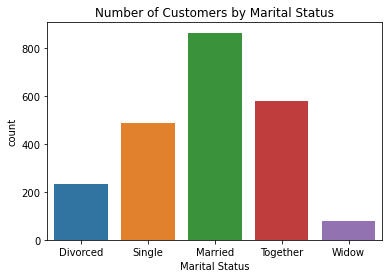

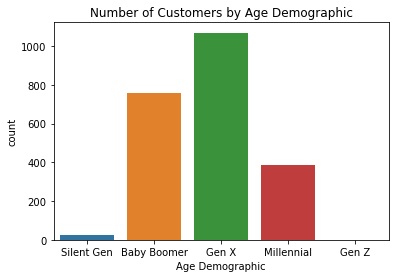

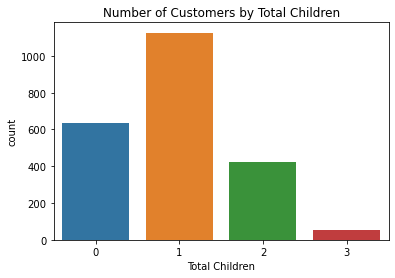

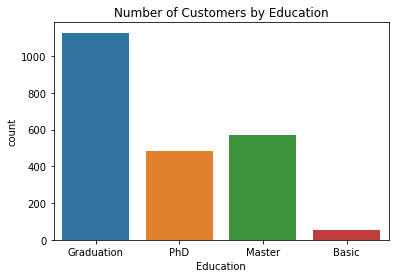

In [25]:
# bar chart that visualizes the number of customers for each demgraphic using a for loop

for i in dem_variables:
    plt.figure()
    sns.countplot(data[i])
    plt.title(f"Number of Customers by {i}")

Observations.
- Almost all customers live in Spain and then South Africa
- Most customers are married
- Most customers are Gen X and baby boomer generation
- Majority of customers have 1 child
- Customer base is highly educated. At least undergrad education for mosts of them.

#### Demographics & Amount Spent

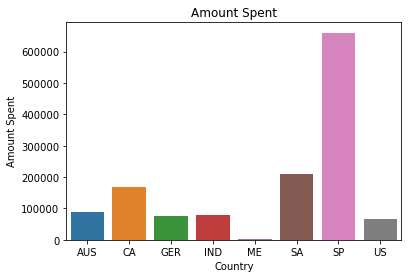

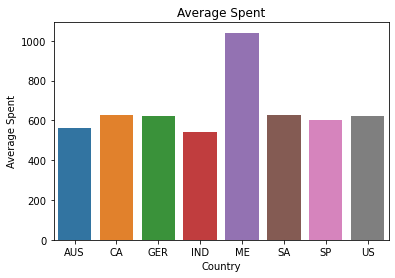

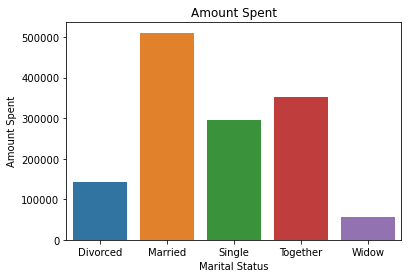

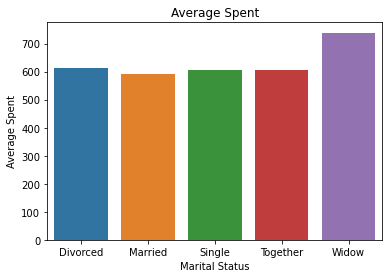

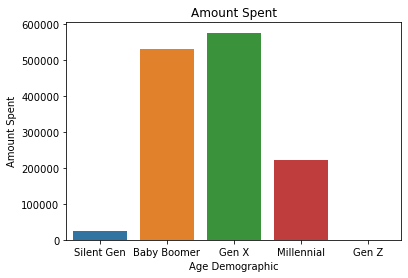

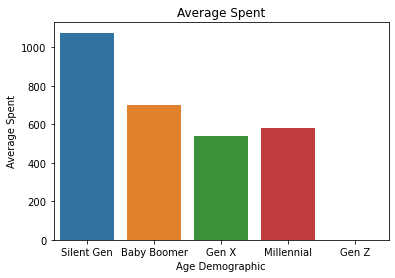

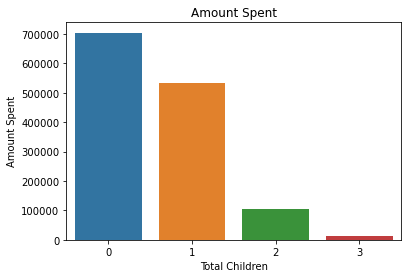

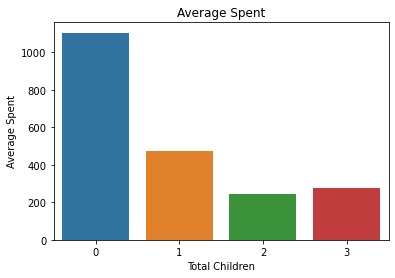

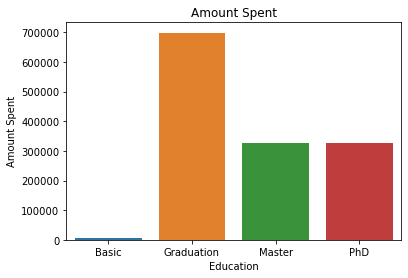

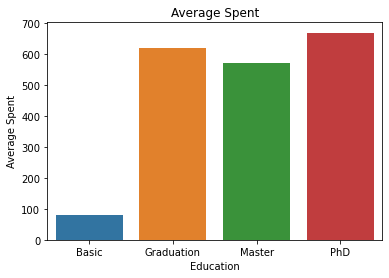

In [26]:
# bar charts showing amount and average spent grouped by each demographic using a for loop

for i in dem_variables:
    c_table = data[[i, "Amount Spent"]].groupby(i).sum()
    c_table["Average Spent"] = data[[i,"Amount Spent"]].groupby(i).mean()

# bar charts showing amount and average spent grouped by each demographic using a for loop
    for i in c_table.columns:
        plt.figure()
        sns.barplot(x=c_table.index,y=c_table[i])
        plt.title(f"{i}")

Observations.
- Spanish customers spent the most overall. But in average they were 6th.
- Married customers spent the most, but the least on average
- Gen X customers spent the most, but the least on average
- Customers without children spent the most overall and on average.

### Product Performance

In [27]:
# renaming columns to get cleanner graph labels

data = data.rename(columns={"MntWines" : "Wines",
                     "MntFruits" : "Fruits",
                     "MntMeatProducts": "Meats",
                     "MntFishProducts" : "Fish",
                     "MntSweetProducts" : "Sweets",
                     "MntGoldProds" : "Gold"})

In [28]:
# making a list of product variables

products = ["Wines", "Fruits", "Meats", "Fish", "Sweets", "Gold"]

Text(0.5, 0, 'Product Type')

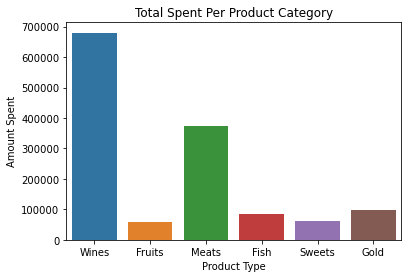

In [29]:
# creating table that shows the total amount spent per product category

product_sum = data[products].sum(axis=0)
product_sum = pd.DataFrame(product_sum, columns=["Amount Spent"])

# bar chart the table

sns.barplot(x=product_sum.index,y=product_sum["Amount Spent"])
plt.title("Total Spent Per Product Category")
plt.xlabel('Product Type')

Observations.
- Most revenue comes with wines
- The least amount of revenue comes from fruits

### Product Sales & Demographics

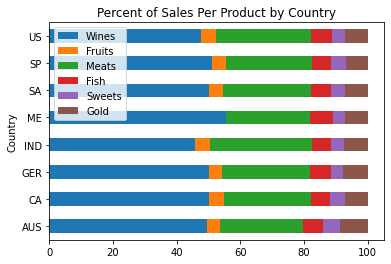

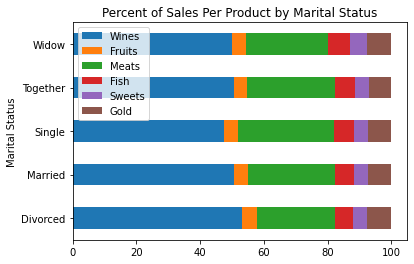

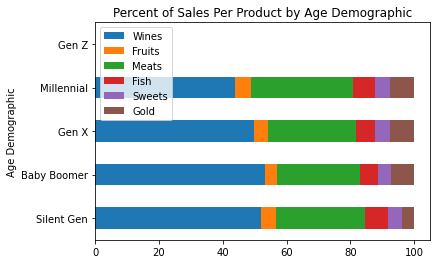

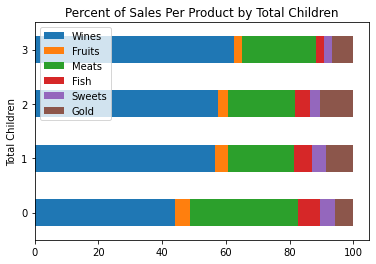

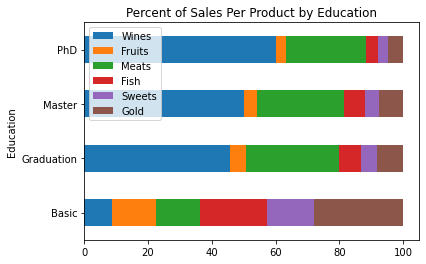

In [30]:
# creating a stacked bar chart showing the percentage of sales attributed to each product for every demographic variable

for i in dem_variables:
    df = data[[i,'Wines','Fruits', 'Meats', 'Fish', 'Sweets', 'Gold']].groupby(i).sum()
    df = df.div(df.sum(axis=1), axis=0)*100
    df = df.reset_index()
    df.plot(
    x=i,
    kind= 'barh',
    stacked= True,
    mark_right= True)
    plt.title(f"Percent of Sales Per Product by {i}")

Observations.
- Revenue by product is proportional to each country
- Meats performed best and Wines worst among customers with 0 children compare to customers with 1,2, and 3 children
- Positive relationship between wine performance and the education level of customers
- Performance of sweets does not increase with the number of children

### Sales by Channel

#### Total purchases by Sales Channel

In [31]:
# renaming columns to make clearer graph labels

data = data.rename(columns={"NumWebPurchases" : "Website",
                     "NumCatalogPurchases" : "Catalog",
                     "NumStorePurchases": "Store",
                     })

In [32]:
# making list of sales channel variables

sales_c = ["Website", "Catalog", "Store"]

Text(0.5, 0, 'Sales Channel')

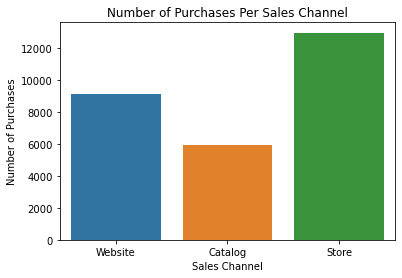

In [33]:
# making a table showing the number of purchases accross each sales channel

sales_channel = data[sales_c].sum(axis=0)
sales_channel = pd.DataFrame(sales_channel, columns=["Number of Purchases"])

# bar chart the table
sns.barplot(x=sales_channel.index, y=sales_channel["Number of Purchases"])
plt.title("Number of Purchases Per Sales Channel")
plt.xlabel("Sales Channel")

Observations.
- Store > Website > Catalog

### Sales Channel Purchases & Demographics

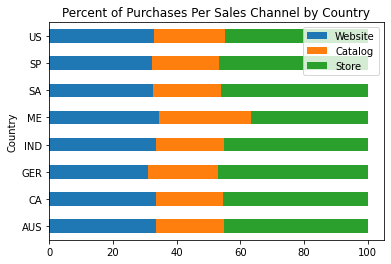

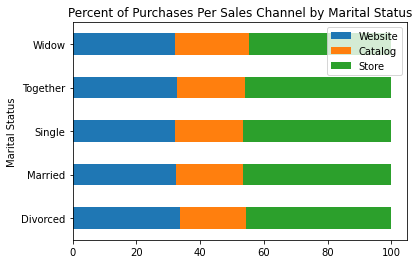

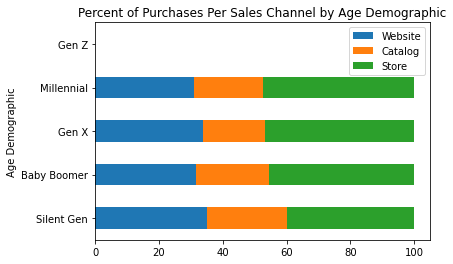

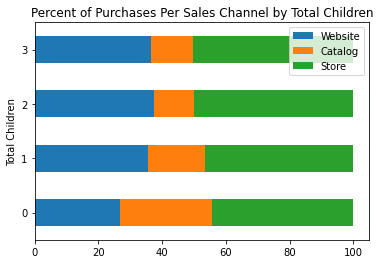

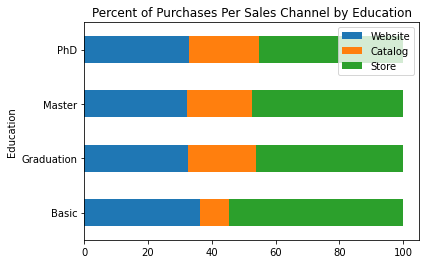

In [34]:
# making a stacked bar chart showing the percentage of purchases attributed to each sales channel for every demographic variable

for i in dem_variables:
    df = data[[i,"Website", "Catalog", "Store"]].groupby(i).sum()
    df = df.div(df.sum(axis=1), axis=0)*100
    df = df.reset_index()
    df.plot(
    x=i,
    kind= 'barh',
    stacked= True,
    mark_right= True)
    plt.title(f"Percent of Purchases Per Sales Channel by {i}")

Observations.
- Sales performance is similar across the world. Only catalog performed better and the store worst in Montenegro
- Website performed worst among Millenials
- Negative relationship between number of children and store performance
- Catalog performed much better among customers with 0 children compared to 1,2, and 3 children.
- Store performed better among customers with basic education

### Correlations

#### Heatmap

In [35]:
# making a list of variables to include in the correlation graph
corr_var = ["Year_Birth", "Kidhome", "Teenhome", "Recency", "Wines", "Fruits", "Meats", "Fish", "Sweets", "Gold", "NumDealsPurchases", "Website", "Catalog", "Store", "NumDealsPurchases", "NumWebVisitsMonth", "log(Income)", "Amount Spent", "Products Purchased", "Total Children"]

Text(0.5, 1.0, 'Correlation Heatmap')

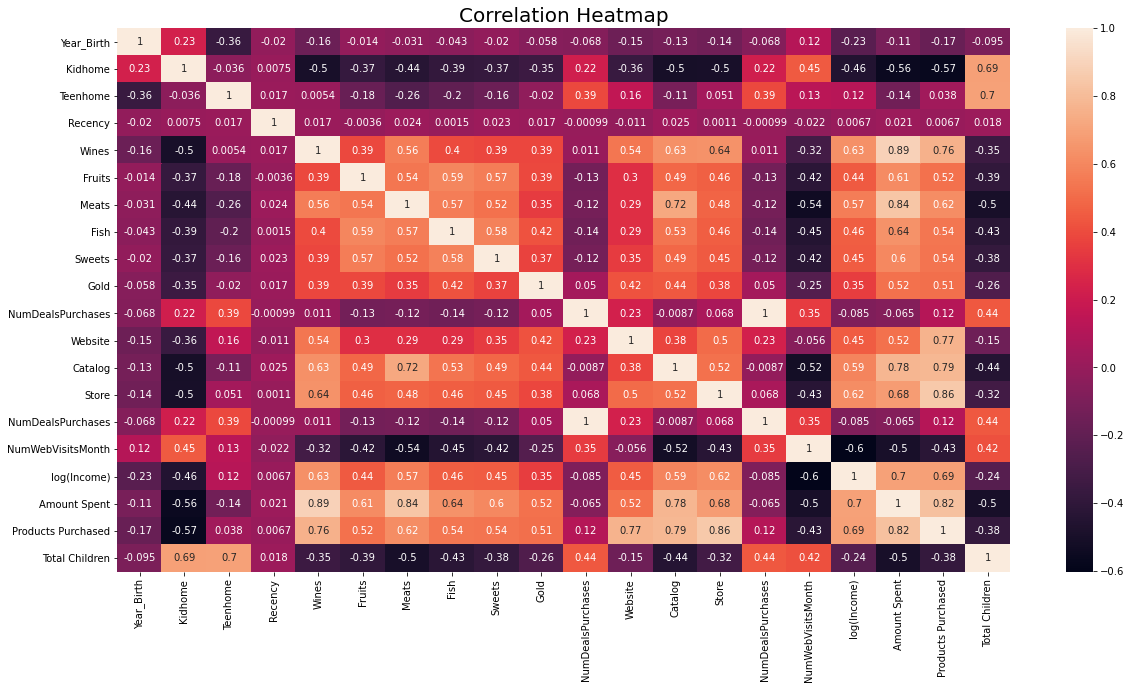

In [36]:
# Find correlations between the varables of interest
corr_var = data[corr_var]

# Graph the correlations
plt.figure(figsize=(20,10))
sns.heatmap(corr_var.corr(),annot=True)
plt.title("Correlation Heatmap", size=20)

Observations.
- Wine is the only product with strong positive relationship between amount spent and total number of products
- Wines and Meats are only two products with strong correlation
- Amount spent in meat has a strong positive relationship with the amount of products purchased by catalog
- Number of products purchased through the catalog has a strong positive relationship with the total amount spent

### Linear Regresion (Coming Soon)